# RNN

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
import math
numpy.random.seed(7)
dataframe = pandas.read_csv('passengers.csv', usecols=[1],
                           engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

Using TensorFlow backend.


96 48


In [3]:
# window size로 독립변수와 종속변수를 분리
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

look_back = 2 # window size
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)








Epoch 1/200





 - 5s - loss: 90085.9055
Epoch 2/200
 - 0s - loss: 78715.3146
Epoch 3/200
 - 0s - loss: 70645.5389
Epoch 4/200
 - 0s - loss: 64820.6602
Epoch 5/200
 - 0s - loss: 60568.5388
Epoch 6/200
 - 0s - loss: 57493.5670
Epoch 7/200
 - 0s - loss: 55295.3161
Epoch 8/200
 - 0s - loss: 53687.1267
Epoch 9/200
 - 0s - loss: 52534.2290
Epoch 10/200
 - 0s - loss: 51639.1572
Epoch 11/200
 - 0s - loss: 50881.3457
Epoch 12/200
 - 0s - loss: 50093.0191
Epoch 13/200
 - 0s - loss: 49141.9657
Epoch 14/200
 - 0s - loss: 47788.4251
Epoch 15/200
 - 0s - loss: 45751.2486
Epoch 16/200
 - 0s - loss: 42666.2211
Epoch 17/200
 - 0s - loss: 38328.0491
Epoch 18/200
 - 0s - loss: 32632.8639
Epoch 19/200
 - 0s - loss: 26079.3964
Epoch 20/200
 - 0s - loss: 19203.1052
Epoch 21/200
 - 0s - loss: 13081.7069
Epoch 22/200
 - 0s - loss: 8136.8942
Epoch 23/200
 - 0s - loss: 4791.5954
Epoch 24/200
 - 0s - loss: 2652.5190
Epoch 25/200
 - 0s - loss: 1580.7391
Epoch 26/200
 - 0s - loss: 1023.4857
Epoch 27/200
 

Epoch 160/200
 - 0s - loss: 598.9528
Epoch 161/200
 - 0s - loss: 596.0134
Epoch 162/200
 - 0s - loss: 599.7078
Epoch 163/200
 - 0s - loss: 593.1386
Epoch 164/200
 - 0s - loss: 592.7614
Epoch 165/200
 - 0s - loss: 605.3726
Epoch 166/200
 - 0s - loss: 609.0536
Epoch 167/200
 - 0s - loss: 592.5354
Epoch 168/200
 - 0s - loss: 599.1362
Epoch 169/200
 - 0s - loss: 589.7647
Epoch 170/200
 - 0s - loss: 598.6107
Epoch 171/200
 - 0s - loss: 590.1529
Epoch 172/200
 - 0s - loss: 589.3931
Epoch 173/200
 - 0s - loss: 596.4143
Epoch 174/200
 - 0s - loss: 604.5318
Epoch 175/200
 - 0s - loss: 588.5148
Epoch 176/200
 - 0s - loss: 587.1635
Epoch 177/200
 - 0s - loss: 584.2845
Epoch 178/200
 - 0s - loss: 592.8003
Epoch 179/200
 - 0s - loss: 585.6782
Epoch 180/200
 - 0s - loss: 587.6132
Epoch 181/200
 - 0s - loss: 595.1088
Epoch 182/200
 - 0s - loss: 584.3079
Epoch 183/200
 - 0s - loss: 586.9193
Epoch 184/200
 - 0s - loss: 581.5911
Epoch 185/200
 - 0s - loss: 583.8105
Epoch 186/200
 - 0s - loss: 587.2322
E

In [5]:
# 데이터 분할 (시계열 데이터 형태에 일치 시킴)
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

Train Score: 564.76 MSE (23.76 RMSE)


# 시 계 열
https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('austr.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [49]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [50]:
df.index.freq = 'MS'
ax = df['Monthly beer prodcution'].plot(figsize=(16,5), title="Monthly Beer Production")
ax.set(xlabel = 'Dates', ylabel='Total Production')

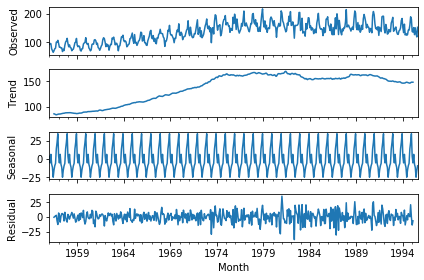

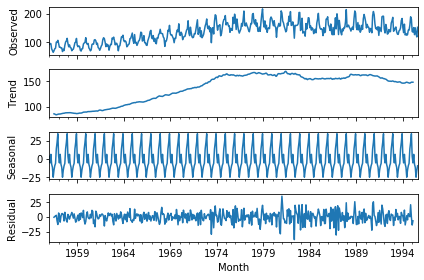

In [52]:
a = seasonal_decompose(df["Monthly beer production"], model='add')
a.plot()

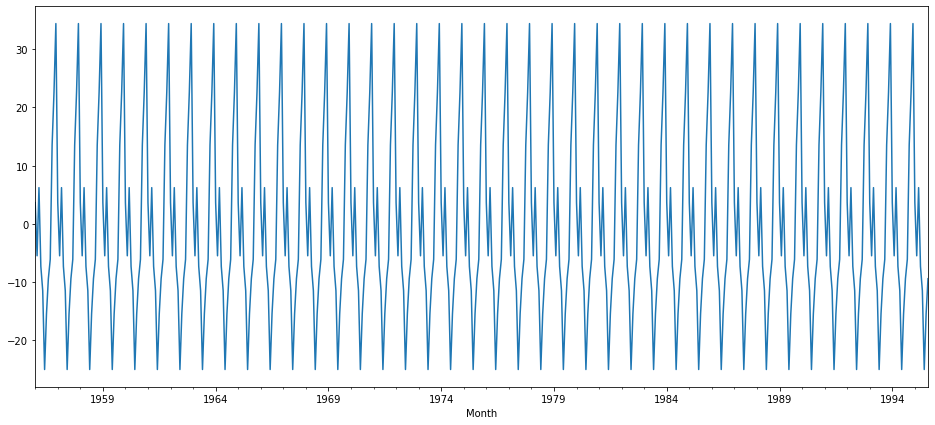

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot()

In [54]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12, max_p=7, max_q=7, max_P=4,
          max_D=4, max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, 1, 12)   Log Likelihood               -1738.352
Date:                            Tue, 11 Feb 2020   AIC                           3498.704
Time:                                    11:33:39   BIC                           3544.500
Sample:                                         0   HQIC                          3516.713
                                            - 476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.019      0.073      0.941      -0.035       0.038
ar.L1         -1.1475      0.005   -214.948      0.000      -1.158      -1.137
ar.L2         -0.9906      0.006   -177.340      0.000      -1.002      -0.980
ma.L1          0.2167      0.024      9.054      0.000       0.170       0.264
ma.L2         -0.0095      0.024     -0.404      0.687      -0.056       0.037
ma.L3         -0.8631      0.022    -38.662      0.000      -0.907      -0.819
ar.S.L12       0.9671      0.084     11.520      0.000       0.803       1.132
ar.S.L24       0.0079      0.053      0.149      0.881      -0.096       0.111
ar.S.L36       0.0161      0.063      0.254      0.799      -0.108       0.140
ma.S.L12      -0.7595      0.072    -10.586      0.000      -0.900      -0.619
sigma2        80.5134      4.294     18.749      0.000      72.097      88.930
===================================================================================
Ljung-Box (Q):                       60.28   Jarque-Bera (JB):                37.04
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# Stata ARIMA 아리마 모형 (비정상적 데이터 분석이 가능)
# AR, MA, ARMA -> 정상성을 띈 시계열 분석 모델
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Monthly beer production'],
                     order = (2,1,1), seasonal_order=(4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -1707.862
Date:                            Tue, 11 Feb 2020   AIC                           3437.725
Time:                                    13:14:26   BIC                           3483.240
Sample:                                01-01-1956   HQIC                          3455.643
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1198      0.041     -2.913      0.004      -0.200      -0.039
ar.L2         -0.1670      0.044     -3.807      0.000      -0.253      -0.081
ma.L1         -0.8455      0.027    -30.846      0.000      -0.899      -0.792
ar.S.L12       1.7682      0.117     15.141      0.000       1.539       1.997
ar.S.L24      -1.6311      0.226     -7.223      0.000      -2.074      -1.188
ar.S.L36       0.8022      0.178      4.518      0.000       0.454       1.150
ar.S.L48       0.0595      0.064      0.927      0.354      -0.066       0.185
ma.S.L12      -1.5659      0.128    -12.264      0.000      -1.816      -1.316
ma.S.L24       1.4033      0.215      6.536      0.000       0.982       1.824
ma.S.L36      -0.6620      0.124     -5.325      0.000      -0.906      -0.418
sigma2        83.5750      4.890     17.090      0.000      73.990      93.160
===================================================================================
Ljung-Box (Q):                       92.60   Jarque-Bera (JB):                41.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
arima_pred = arima_result.predict(start=len(train_data),
                                 end=len(df)-1, typ='levels').rename('ARIMA Predictions')
arima_pred

1994-09-01    133.992296
1994-10-01    157.785179
1994-11-01    181.953065
1994-12-01    183.559675
1995-01-01    144.792369
1995-02-01    136.760447
1995-03-01    151.258433
1995-04-01    133.024535
1995-05-01    137.839346
1995-06-01    120.595409
1995-07-01    128.384947
1995-08-01    138.849813
Freq: MS, Name: ARIMA Predictions, dtype: float64

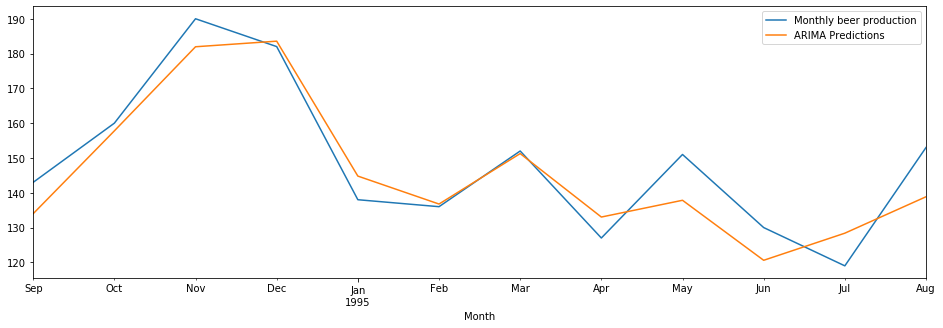

In [58]:
test_data['Monthly beer production'].plot(figsize=(16,5), legend=True)
arima_pred.plot(legend=True)

In [60]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.56196226933746
RMSE Error: 8.097034165009893
Mean: 136.39537815126045


In [61]:
test_data['ARIMA_Predictions'] = arima_pred

# LSTM  forecast

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [64]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [65]:
lstm_model.fit_generator(generator, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
452/452 [==============================] - 10s 21ms/step - loss: 0.0253 0s - loss: 0.025
Epoch 2/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0148: 0s - loss:
Epoch 3/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0116
Epoch 4/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0088
Epoch 5/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0077
Epoch 6/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0077
Epoch 7/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0080
Epoch 8/20
452/452 [==============================] - 9s 21ms/step - loss: 0.0075
Epoch 9/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0077
Epoch 10/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0067
Epoch 11/20
452/452 [==============================] - 

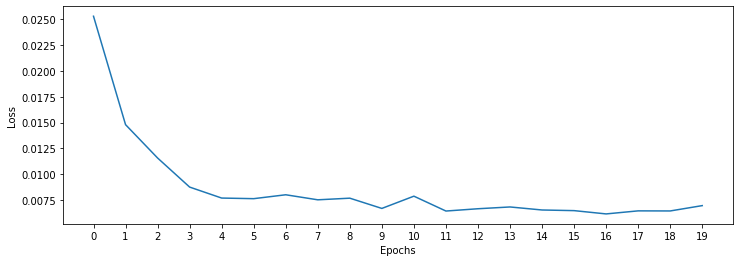

In [66]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [68]:
lstm_predictions_scaled = list()
batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],
                             [[lstm_pred]], axis=1)

In [69]:
lstm_predictions_scaled

[array([0.5231276], dtype=float32),
 array([0.5946881], dtype=float32),
 array([0.69163775], dtype=float32),
 array([0.6886584], dtype=float32),
 array([0.55562246], dtype=float32),
 array([0.51400036], dtype=float32),
 array([0.5685879], dtype=float32),
 array([0.43877816], dtype=float32),
 array([0.4356246], dtype=float32),
 array([0.4159373], dtype=float32),
 array([0.43923897], dtype=float32),
 array([0.49977493], dtype=float32)]

In [70]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[144.83852516],
       [155.78728198],
       [170.62057643],
       [170.16473769],
       [149.81023614],
       [143.4420545 ],
       [151.79394858],
       [131.93305879],
       [131.45056372],
       [128.43840759],
       [132.00356172],
       [141.26556473]])

In [72]:
test_data['LSTM_predictions'] = lstm_predictions
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_predictions
Month,,,
1994-09-01,143.0,133.992296,144.838525
1994-10-01,160.0,157.785179,155.787282
1994-11-01,190.0,181.953065,170.620576
1994-12-01,182.0,183.559675,170.164738
1995-01-01,138.0,144.792369,149.810236
1995-02-01,136.0,136.760447,143.442054
1995-03-01,152.0,151.258433,151.793949
1995-04-01,127.0,133.024535,131.933059
1995-05-01,151.0,137.839346,131.450564


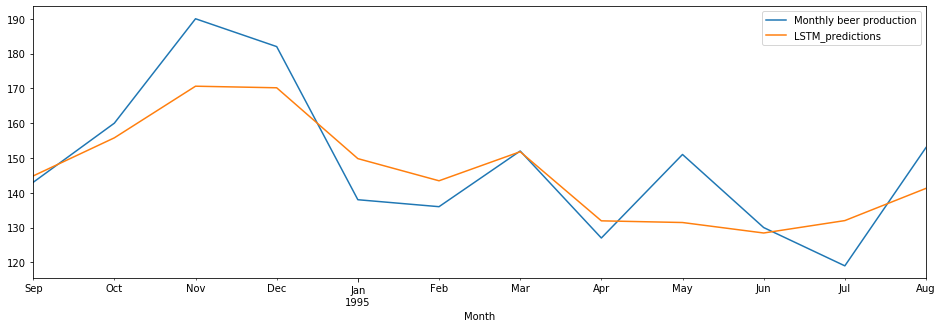

In [74]:
test_data['Monthly beer production'].plot(figsize=(16,5), legend=True)
test_data['LSTM_predictions'].plot(legend=True)

In [76]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data['LSTM_predictions'])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 120.61788811722097
RMSE Error: 10.982617543974705
Mean: 136.39537815126045


# Embeddings
https://jovianlin.io/embeddings-in-keras/

In [3]:
import re
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

docs = ['Well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!',
        'Weak', 'Poor effort!', 'not good', 'poor work', 'Could have done better.']
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 

own_embedding_vocab_size = 10
encoded_docs_oe = [one_hot(d, own_embedding_vocab_size) for d in docs]
print(encoded_docs_oe)

maxlen = 5
padded_docs_oe = pad_sequences(encoded_docs_oe, maxlen=maxlen, padding='post')
print(padded_docs_oe)

[[4, 4], [9, 7], [8, 8], [5, 7], [8], [3], [1, 8], [5, 9], [1, 7], [8, 2, 4, 1]]
[[4 4 0 0 0]
 [9 7 0 0 0]
 [8 8 0 0 0]
 [5 7 0 0 0]
 [8 0 0 0 0]
 [3 0 0 0 0]
 [1 8 0 0 0]
 [5 9 0 0 0]
 [1 7 0 0 0]
 [8 2 4 1 0]]


In [82]:
model = Sequential()
model.add(Embedding(input_dim=own_embedding_vocab_size, output_dim=32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
model.fit(padded_docs_oe, labels, epochs=50, verbose=0)
loss, accuracy = model.evaluate(padded_docs_oe, labels, verbose=0)
print('Accuracy: %0.3f' % accuracy)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5, 32)             320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 161       
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 0.900


In [101]:
d = "good work"
encoded_docs_oe_t = [one_hot(d, own_embedding_vocab_size)]
encoded_docs_oe_t
padded_docs_oe_t = pad_sequences(encoded_docs_oe_t, maxlen=maxlen, padding='post')                     
padded_docs_oe_t
model.predict(padded_docs_oe_t)

array([[0.5235652]], dtype=float32)

In [102]:
word = "Good work"
word_docs_oe = [one_hot(word, own_embedding_vocab_size)]
word_oe = pad_sequences(word_docs_oe, maxlen=maxlen, padding='post')
pred = model.predict(word_oe)
import numpy as np
np.round(pred)

array([[1.]], dtype=float32)

# tokenizer
https://www.programcreek.com/python/example/97467/keras.datasets.reuters.load_data (ex.2)

In [4]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from functools import partial
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

#np_load_old = np.load
#np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)
max_words = 1000
batch_size = 100
nb_epoch = 200

(X_train, y_train), (X_test, y_test) = reuters.load_data(nb_words=max_words, test_split=0.2)
#np.load = np_load_old

nb_classes = np.max(y_train) + 1
tokenizer = Tokenizer(nb_words = max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
X_train.shape

(8982, 1000)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [10]:
history = model.fit(X_train, y_train, nb_epoch=nb_epoch,
                   batch_size=batch_size, verbose=0, validation_split=0.1)
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('\n\nModel accuracy: %.2f%%' % (score[1]*100))
print('Model loss: %.2f%%' % (score[0]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ICT01_13\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


2246/2246 [==============================] - 0s 16us/step


Model accuracy: 78.50%
Model loss: 168.55%


In [13]:
!pip install JPype1-0.7.1-cp37-cp37m-win_amd64.whl

Processing c:\users\ict01_13\desktop\kkyul\jpype1-0.7.1-cp37-cp37m-win_amd64.whl


ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'C:\\Users\\ICT01_13\\Desktop\\kkyul\\JPype1-0.7.1-cp37-cp37m-win_amd64.whl'



In [12]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
res = requests.get('https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=005&aid=0001287033')
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.find(id='articleBodyContents')
a = body.get_text()
a

'\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n검찰 “피고인들로서는 그렇게 주장할 수밖에… 법정서 밝히겠다”서울 서초구 서울중앙지검. 윤성호 기자검찰의 울산시장 선거개입 사건 수사 결과 재판에 넘겨진 백원우 민주연구원 부원장(전 청와대 민정비서관), 한병도 전 청와대 정무수석, 장환석 전 청와대 선임행정관이 11일 각자의 변호인을 통해 입장을 밝혔다. 이들은 공소사실이 “검찰의 주관적 추측과 예단으로 범벅돼 있다”고 주장했다. 또 “검찰 공소장에 문재인 대통령의 선거개입 관여 인상을 주는 표현이 있어 크게 우려된다”고도 했다.한 전 수석은 변호인 입장문을 통해 “지방선거 이전부터 임동호 후보로부터 공사의 직과 관련한 여러 요청을 먼저 받았다”고 밝혔다. 송철호 울산시장의 당선을 위해 당내 경쟁자를 매수하려 한 것이 아니라, 거꾸로 자리 요구를 받았다는 얘기다. 앞서 검찰은 한 전 수석이 임동호 전 더불어민주당 최고위원에게 공기업 사장 자리 등을 제공하겠다며 출마 포기를 권유했다고 결론짓고 한 전 수석을 공직선거법위반 혐의로 기소했다.임 전 최고위원 측도 한 전 수석의 주장에 동의했다. 임 전 최고위원 측 인사는 이날 국민일보와의 통화에서 “임 전 최고위원이 ‘오사카 총영사로 가 보고 싶다’고 처음에 이야기했다”며 “‘자리를 먼저 요청했다’고 표현할 수는 있을 것”이라고 말했다. 임 전 최고위원은 이후 최고위원 임기를 마칠 때의 회식 자리에서 한 전 수석에게 “오사카 총영사 자리를 한번 알아봤느냐”는 취지로 다시 물어봤다고 한다. 다만 선거 불출마를 조건으로 이야기를 나눈 적은 없었다는 입장이다.윤석열 검찰총장이 6일 서울 서초구 대검찰청에서 점심 식사를 위해 이동하다 창밖을 바라보고 있다. 윤성호 기자장 전 선임행정관은 2018년 지방선거 전 민간인이던 송철호 울산시장, 송병기 전 울산시 경제부시장 등과 식사를 하며 울산 지역 현안에 관해 대화를 나눈 사실은 인정했다.

In [10]:
body

In [4]:
text = " ".join(p.get_text() for p in body.find_all('p'))
text

' [스포탈코리아] 정현준 인턴기자= 시즌 초 경기력과 완전히 달라졌다. 손흥민(26, 토트넘 홋스퍼)의 2018/2019 시즌이 점점 뜨거워진다. 손흥민은 지난달 첼시와 2018/2019 잉글랜드 프리미어리그(EPL) 13라운드에서 50m를 질주하는 원더골을 터트렸다. 손흥민의 놀라운 득점에 현지 언론은 찬사를 보냈고, 팬들은 그의 경기력을 높게 평가하며 부활을 기대했다. 12월에 접어들자 폭발력이 한층 강력해졌다. 이달 초 토트넘은 아스널에 2-4로 역전패했지만, 손흥민은 페널티킥을 얻어내며 공격진에서 두각을 드러냈다. 시작에 불과했다. 사우샘프턴-레스터 시티를 상대로 2경기 연속골을 작렬하며 물오른 기량을 과시했다. 특히 레스터전에서는 혼자서 1골 1도움을 올리며 토트넘에 2-0 승리를 선물했다. 손흥민은 측면과 최전방, 어느 자리에 배치해도 최상의 경기력을 펼쳤다. 아스널과 카라바오컵 8강전에서 최전방 공격수로 나서 경기 20분 만에 선제 결승골을 터트렸다. 이 골을 기점으로 아스널은 급격히 무너졌고, 그는 북런던 더비 9경기 만에 첫 골을 신고하며 앞서 당한 패배를 설욕했다. 손흥민의 기세가 절정에 달하자 각 팀의 견제도 심해졌다. 지난 주말 에버턴은 공식 홈페이지를 통해 손흥민을 토트넘의 주요 선수로 지목하며 위협적인 존재로 평가하며 만반의 준비를 했으나 역부족이었다. 손흥민은 에버턴의 실수를 놓치지 않고 동점골을 터트리더니 추가골에 이어 해리 케인의 득점까지 도와 MOM(Man Of the Match)으로 선정됐다. 27일(한국시간) 본머스도 손흥민에게 무릎을 꿇었다. 손흥민은 전반 23분 카일 워커 피터스의 패스를 받아 오른발 슈팅으로 골문을 뚫었고, 후반 25분에는 골키퍼가 모우라의 슈팅을 쳐내면서 흘린 공을 차분히 밀어 넣어 완승 발판을 만들었다. 2경기 연속 멀티골에 토트넘은 환호했고, 마우리시오 포체티노 감독은 “어메이징”이라는 표현으로 손흥민을 극찬했다. 시즌 초 부진을 12월에 제대로 풀고 있다. 손흥민은 대표팀과 소속팀을 왕래하면서 

In [2]:
t = Twitter()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name='스포츠')
ko.vocab().most_common(10)
data = ko.vocab().most_common(500)
tmp_dataq = dict(data)

wordcloud = WordCloud(font_path='/Library/Fonts/NanumMyeongjo.ttf',
                      background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'tmp_data' is not defined

In [17]:
from keras.datasets import imdb
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from functools import partial
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import LSTM

#np_load_old = np.load
#np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=2000)
#np.load = np_load_old

X_train = sequence.pad_sequences(X_train, maxlen=80)
X_test = sequence.pad_sequences(X_test, maxlen=80)
print(X_train[1])

[ 125   68    2    2   15  349  165    2   98    5    4  228    9   43
    2 1157   15  299  120    5  120  174   11  220  175  136   50    9
    2  228    2    5    2  656  245    2    5    4    2  131  152  491
   18    2   32    2 1212   14    9    6  371   78   22  625   64 1382
    9    8  168  145   23    4 1690   15   16    4 1355    5   28    6
   52  154  462   33   89   78  285   16  145   95]


In [18]:
model = Sequential()
model.add(Embedding(2000, 128)) # 단어장의 크기, 벡터로 변환
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # 셀의 가중치, 셀의 크기
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 104s 4ms/step - loss: 0.5044 - acc: 0.7518 - val_loss: 0.4971 - val_acc: 0.7658
Epoch 2/15
25000/25000 [==============================] - 100s 4ms/step - loss: 0.3932 - acc: 0.8248 - val_loss: 0.3974 - val_acc: 0.8151
Epoch 3/15
25000/25000 [==============================] - 100s 4ms/step - loss: 0.3641 - acc: 0.8399 - val_loss: 0.4414 - val_acc: 0.8094
Epoch 4/15
25000/25000 [==============================] - 100s 4ms/step - loss: 0.3282 - acc: 0.8555 - val_loss: 0.3625 - val_acc: 0.8394
Epoch 5/15
25000/25000 [==============================] - 101s 4ms/step - loss: 0.2960 - acc: 0.8730 - val_loss: 0.3801 - val_acc: 0.8300
Epoch 6/15
25000/25000 [==============================] - 100s 4ms/step - loss: 0.2789 - acc: 0.8820 - val_loss: 0.3853 - val_acc: 0.8390
Epoch 7/15
25000/25000 [==============================] - 100s 4ms/step - loss: 0.2582 - acc: 0.8924 - val_loss: 0.3949 - 

In [22]:
dictionary = imdb.get_word_index(path='imdb_word_index.json')
imdb_key = dictionary.keys()
list(imdb_key)[1]

1646592/1641221 [==============================] - 1s 1us/step


'tsukino'

In [ ]:
# 숙제
# 문제 x_train[1] 문장으로 변환해 보세요
# model.summary를 해보고 가중치 사이즈를 계산해보세요

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________
